In [1]:
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.spatial.distance
import scipy.ndimage.filters
import copy
from matplotlib import animation
import matplotlib as mpl
from pylab import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import font_manager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.pyplot import cm
from matplotlib.cm import ScalarMappable
# Edit the font, font size, and axes width
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.25

import matplotlib.font_manager as fm

font_dir = ['../fig_utils/fonts/helvetica/']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
#print(font_names)
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['font.size'] = 8
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['xtick.major.pad']='1'
mpl.rcParams['ytick.major.pad']='1'

%matplotlib inline


figure_dir = 'figs'
os.makedirs(figure_dir, exist_ok=True)

In [2]:
holo_dir = "../holo/fes/outputs/"
apo_dir = "../aligned/fes/outputs/"
holo_zero = "../holo/fes_no_force/outputs/"
apo_zero = "../aligned/fes_no_force/outputs/"

In [4]:
all_fes_ext_proj = {}
all_fes_proj_cmap = {}
all_fes_ext_cmap = {}

all_fes_ext = {}
all_fes_proj = {}
all_fes_cmap = {}

for i in np.linspace(-30.0,30.0,7):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    all_fes_ext_proj[key]=[]
    all_fes_ext[key]=[]
    all_fes_proj[key]=[]
    all_fes_cmap[key] = []
    all_fes_proj_cmap[key] = []
    all_fes_ext_cmap[key] = []



for k in all_fes_ext_proj:
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_projext_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_projext_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext_proj[k].append(dist)
        

for k in all_fes_proj_cmap:
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_projcmap_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_projcmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_proj_cmap[k].append(dist)


for k in all_fes_ext_cmap:
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_extcmap_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_extcmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext_cmap[k].append(dist)
        

for k in all_fes_proj:
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_proj_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_proj_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_proj[k].append(dist)
        

for k in all_fes_ext :
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_ext_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_ext_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext[k].append(dist)
         

for k in all_fes_cmap:
    if k == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_cmap_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_cmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_cmap[k].append(dist)

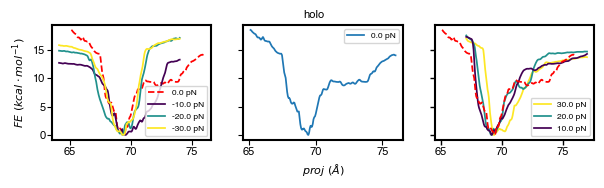

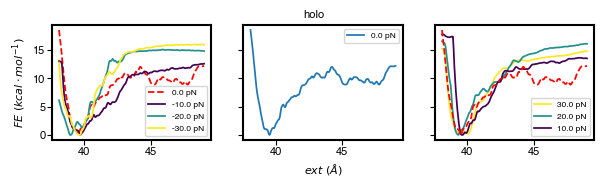

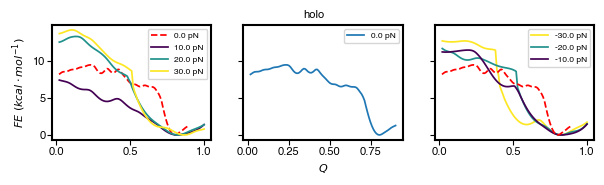

In [5]:
fcolors =  cm.viridis(np.linspace(0, 1, 3))
force_color={}
c_i=-1
c_j=0
for key in all_fes_proj:
    if float(key)<0:
        force_color[key]=fcolors[c_i]
        c_i -=1
    elif float(key)>0:
        force_color[key]=fcolors[c_j]
        c_j +=1
        
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in all_fes_proj:
    runs=all_fes_proj[key]
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{float(key)*-1} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{float(key)*-1} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$proj\ (\AA)$',  size=8) 
plt.tick_params(axis='both', labelsize=8, width=1)
#plt.setp(ax1.get_xticklabels(), visible=False)
fig.suptitle('holo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_proj_rw_forces_plumed_wham2.png", bbox_inches='tight')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in all_fes_ext:
    runs=all_fes_ext[key]
    #fig,ax = plt.subplots(figsize=(5, 4))
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{float(key)*-1} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{float(key)*-1} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$ext\ (\AA)$',  size=8) 
#plt.tick_params(axis='both', labelsize=8, width=2)
fig.suptitle('holo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_ext_rw_forces_plumed_wham.png", bbox_inches='tight')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in all_fes_cmap:
    runs=all_fes_cmap[key]
    #fig,ax = plt.subplots(figsize=(5, 4))
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$Q$',  size=8)         
#plt.tick_params(axis='both', labelsize=8, width=2)
fig.suptitle('holo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_cmap_rw_forces_plumed_wham.png", bbox_inches='tight')
plt.show()

In [6]:
apo_all_fes_ext_proj = {}
apo_all_fes_proj_cmap = {}
apo_all_fes_ext_cmap = {}

apo_all_fes_ext = {}
apo_all_fes_proj = {}
apo_all_fes_cmap = {}

for i in np.linspace(-30.0,30.0,7):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    apo_all_fes_ext_proj[key]=[]
    apo_all_fes_ext[key]=[]
    apo_all_fes_proj[key]=[]
    apo_all_fes_cmap[key] = []
    apo_all_fes_proj_cmap[key] = []
    apo_all_fes_ext_cmap[key] = []



for k in apo_all_fes_ext_proj:
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_projext_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_projext_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_ext_proj[k].append(dist)
        

for k in apo_all_fes_proj_cmap:
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_projcmap_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_projcmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_proj_cmap[k].append(dist)


for k in apo_all_fes_ext_cmap:
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_extcmap_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_extcmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_ext_cmap[k].append(dist)
        

for k in apo_all_fes_proj:
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_proj_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_proj_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_proj[k].append(dist)
        

for k in apo_all_fes_ext :
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_ext_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_ext_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_ext[k].append(dist)
         

for k in apo_all_fes_cmap:
    if k == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_cmap_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_cmap_rw.dat"
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    apo_all_fes_cmap[k].append(dist)

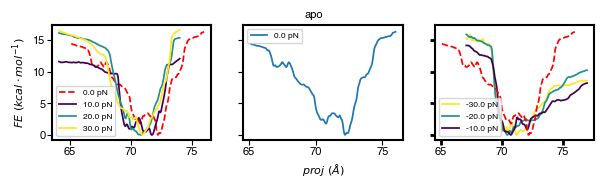

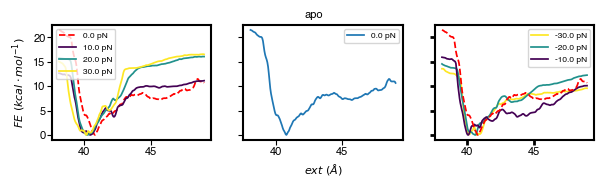

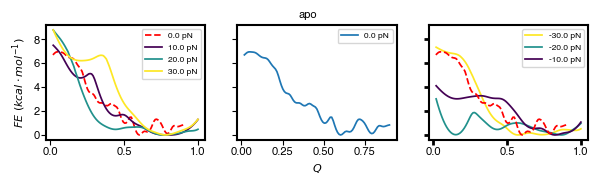

In [7]:
fcolors =  cm.viridis(np.linspace(0, 1, 3))
force_color={}
c_i=-1
c_j=0
for key in apo_all_fes_proj:
    if float(key)<0:
        force_color[key]=fcolors[c_i]
        c_i -=1
    elif float(key)>0:
        force_color[key]=fcolors[c_j]
        c_j +=1
        
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in apo_all_fes_proj:
    runs=apo_all_fes_proj[key]
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$proj\ (\AA)$',  size=8) 
plt.tick_params(axis='both', labelsize=8, width=2)
#plt.setp(ax1.get_xticklabels(), visible=False)
fig.suptitle('apo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_proj_rw_forces_plumed_wham.png", bbox_inches='tight')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in apo_all_fes_ext:
    runs=apo_all_fes_ext[key]
    #fig,ax = plt.subplots(figsize=(5, 4))
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$ext\ (\AA)$',  size=8) 
plt.tick_params(axis='both', labelsize=8, width=2)
fig.suptitle('apo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_ext_rw_forces_plumed_wham.png", bbox_inches='tight')
plt.show()



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,1.5), sharey=True)
for key in apo_all_fes_cmap:
    runs=apo_all_fes_cmap[key]
    #fig,ax = plt.subplots(figsize=(5, 4))
    for i,run in enumerate(runs):
        FEmax=np.amax(run[:,1][np.isfinite(run[:,1])])
        FE=run[:,1]
        FE[np.isinf(FE)] = FEmax
        if float(key)<0:
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax3.legend(fontsize=6)
        elif float(key)>0:
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color=force_color[key])
            ax1.legend(fontsize=6)
        else:
            ax2.plot(run[:,0][2:], FE[2:],label=F"{key} pN")
            ax2.legend(fontsize=6)
            ax3.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
            ax1.plot(run[:,0][2:], FE[2:],label=F"{key} pN", color='r',linestyle='--')
    ax1.set_ylabel(r'$FE\ (kcal \cdot mol^{-1})$', size=8)
    ax2.set_xlabel(r'$Q$',  size=8)         
plt.tick_params(axis='both', labelsize=8, width=2)
fig.suptitle('apo', fontsize=8)
fig.savefig(F"{figure_dir}/fes_cmap_rw_forces_plumed_wham.png", bbox_inches='tight')
plt.show()

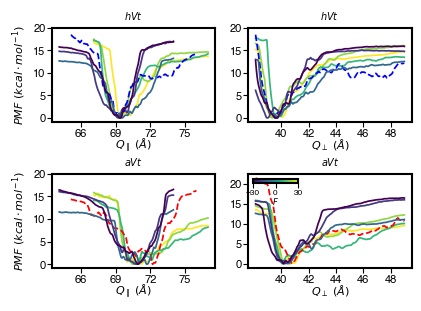

In [8]:
fcolors =  np.flip(cm.viridis(np.linspace(0, 1, 7)),axis=0)
barrier=20 

fig, ax = plt.subplots(2,2,figsize=(4.5,3))
i,j=0,0
k,l=0,1
for c, key in enumerate(all_fes_proj):
    
    if float(key)==0.0:
        lstyle = '--'
        lcolor = 'b'
    else:
        lstyle = '-'
        lcolor = fcolors[c]
    run_p=all_fes_proj[key][0]
    x_p = run_p[:,0]
    y_p = run_p[:,1]
    FEmaxp=np.amax(y_p[np.isfinite(y_p)])
    y_p[np.isinf(y_p)] = FEmaxp

    ax[i,j].plot(x_p[2:], y_p[2:],label=F"{key} pN", color=lcolor,linestyle=lstyle)
    ax[i,j].set_title(r"$hVt$",size=7)
    ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8,labelpad=-1)
    ax[i,j].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=8)
    ax[i,j].set_xticks([i for i in range(66,77,3)])
    ax[i,j].set_yticks([i for i in np.linspace(0,20,5)])
    
    
    run_e=all_fes_ext[key][0]
    x_e = run_e[:,0]
    y_e = run_e[:,1]
    FEmaxe=np.amax(y_e[np.isfinite(y_e)])
    y_e[np.isinf(y_e)] = FEmaxe
    
    ax[k,l].plot(x_e[2:], y_e[2:],label=F"{key} pN", color=lcolor,linestyle=lstyle)
    ax[k,l].set_title(r"$hVt$",size=7)
    ax[k,l].set_xlabel(r'$Q_\perp\ (\AA)$', size=8, labelpad=-1)
    #ax[k,l].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=8)
    ax[k,l].set_xticks([i for i in range(40,49,2)])
    ax[k,l].set_yticks([i for i in np.linspace(0,20,5)])
    
    ext_plot_apo=apo_all_fes_ext["0.0"][0]
    proj_plot_apo=apo_all_fes_proj["0.0"][0]
    ext_plot=all_fes_ext["0.0"][0]
    proj_plot=all_fes_proj["0.0"][0]
    
i,j = 1,0
k,l = 1,1

fcolors =  np.flip(cm.viridis(np.linspace(0, 1, 7)),axis=0)
for c, key in enumerate(apo_all_fes_proj):

    if float(key)==0.0:
        lstyle = '--'
        lcolor = 'r'
    else:
        lstyle = '-'
        lcolor = fcolors[c]
    run_p=apo_all_fes_proj[key][0]
    x_p = run_p[:,0]
    y_p = run_p[:,1]
    FEmaxp=np.amax(y_p[np.isfinite(y_p)])
    y_p[np.isinf(y_p)] = FEmaxp

    ax[i,j].plot(x_p[2:], y_p[2:],label=F"{key} pN", color=lcolor,linestyle=lstyle)
    ax[i,j].set_title(r"$aVt$",size=7)
    ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8, labelpad=-1)
    ax[i,j].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=8)
    ax[i,j].set_xticks([i for i in range(66,77,3)])
    ax[i,j].set_yticks([i for i in np.linspace(0,20,5)])
    
  
    run_e=apo_all_fes_ext[key][0]
    x_e = run_e[:,0]
    y_e = run_e[:,1]
    FEmaxe=np.amax(y_e[np.isfinite(y_e)])
    y_e[np.isinf(y_e)] = FEmaxe
    
    ax[k,l].plot(x_e[2:], y_e[2:],label=F"{key} pN", color=lcolor,linestyle=lstyle)
    ax[k,l].set_title(r"$aVt$",size=7)
    ax[k,l].set_xlabel(r'$Q_\perp\ (\AA)$', size=8, labelpad=-1)
    # ax[k,l].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=8)
    ax[k,l].set_xticks([i for i in range(40,49,2)])
    ax[k,l].set_yticks([i for i in np.linspace(0,20,5)])
    

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.55)
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(-30, 30)
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbaxes = inset_axes(ax[k,l], width=0.45, height='5%', loc='upper left')
cbar = fig.colorbar(sm,cax=cbaxes, ticks = [-30.,0,30], orientation='horizontal')
cbar.ax.tick_params(labelsize=6) 
cbar.set_label(r'$F$', fontsize=6, labelpad=-1)

plt.savefig(f"{figure_dir}/pmf_force_holo_vs_apo_v2.pdf", format='pdf')
plt.show()





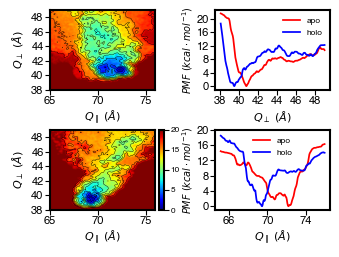

In [9]:
barrier=20 

fig, ax = plt.subplots(2,2,figsize=(3.5,2.5))
i,j=0,0

run=apo_all_fes_ext_proj["0.0"][0]
x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i,j].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i,j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
#ax[i,j].set_title(r"$aVt$",size=8)
ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8, labelpad=2)
ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
ax[i,j].set_yticks([i for i in range(38,49,2)])
divider = make_axes_locatable(ax[i,j])
cax2 = divider.append_axes("right", size="5%", pad=0.035)
cax2.axis('off')
#cbar=fig.colorbar(im, ax=ax, cax=cax2)
#cbar.ax.tick_params(labelsize=8)
#cbar.set_label(r"$FE\ (kcal \cdot mol^{-1})$", size=12)

i=1

run=all_fes_ext_proj["0.0"][0]
x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i,j].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i,j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
#ax[i,j].set_title(r"$hVt$", size=8)
ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8,  labelpad=2)
ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
ax[i,j].set_yticks([i for i in range(38,49,2)])
divider = make_axes_locatable(ax[i,j])
cax2 = divider.append_axes("right", size="5%", pad=0.035)
cbar=fig.colorbar(im, ax=ax[i,j], cax=cax2)
cbar.ax.tick_params(labelsize=6, pad=1)
#cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=6)

ext_plot_apo=apo_all_fes_ext["0.0"][0]
proj_plot_apo=apo_all_fes_proj["0.0"][0]
ext_plot=all_fes_ext["0.0"][0]
proj_plot=all_fes_proj["0.0"][0]

j = 1
i = 0
FEmax=np.amax(ext_plot_apo[:,1][np.isfinite(ext_plot_apo[:,1])])
FE=ext_plot_apo[:,1]
FE[np.isinf(FE)] = FEmax        
ax[i,j].plot(ext_plot_apo[:,0][2:], FE[2:],label=F"apo", color='r')
FEmax=np.amax(ext_plot[:,1][np.isfinite(ext_plot[:,1])])
FE=ext_plot[:,1]
FE[np.isinf(FE)] = FEmax
ax[i,j].plot(ext_plot[:,0][2:], FE[2:],label=F"holo", color='b')
ax[i,j].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=7,  labelpad=1)
ax[i,j].set_xlabel(r'$Q_\perp\ (\AA)$',  size=8, labelpad=2)
ax[i,j].set_yticks([i for i in range(0,21,4)])
ax[i,j].set_xticks([i for i in range(38,49,2)])            
ax[i,j].legend(fontsize=6, frameon=False)

i = 1

FEmax=np.amax(proj_plot_apo[:,1][np.isfinite(proj_plot_apo[:,1])])
FE=proj_plot_apo[:,1]
FE[np.isinf(FE)] = FEmax        
ax[i,j].plot(proj_plot_apo[:,0][2:], FE[2:],label=F"apo", color='r')
FEmax=np.amax(proj_plot[:,1][np.isfinite(proj_plot[:,1])])
FE=proj_plot[:,1]
FE[np.isinf(FE)] = FEmax
ax[i,j].plot(proj_plot[:,0][2:], FE[2:],label=F"holo", color='b')
ax[i,j].set_ylabel(r'$PMF\ (kcal \cdot mol^{-1})$', size=7,  labelpad=1)
ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$',  size=8,  labelpad=2)
ax[i,j].set_yticks([i for i in range(0,21,4)])
ax[i,j].set_xticks([i for i in range(66,77,4)])            
ax[i,j].legend(fontsize=6, frameon=False)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.45,hspace=0.5)
plt.savefig(f"{figure_dir}/ext_proj_holo_vs_apo_noF.pdf", bbox_inches='tight',format='pdf' )
plt.show()


In [25]:
def plot_energy_path(unit, model, forces_barrier, outdir):

    plt.figure(figsize=(5, 4))
    for k in forces_barrier:
        p = forces_barrier[k]
        distances = p[:,0] 
        energies = p[:,1]
        max_energy = max(energies)
        min_energy = min(energies)
        max_ind = np.argmax(energies)
        energy_range = max_energy - min_energy
        plt.plot(distances, energies, 'o-', markerfacecolor='w', label=k)
        plt.xlim([0, 1])
        plt.ylim([min_energy, max_energy + 0.1 * energy_range])
        plt.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color='r')
        #plt.text(distances[max_ind], max_energy, '$E_a=%.2f$ %s' % (max_energy, unit))
        plt.xlabel('Reaction Coordinates')
        plt.ylabel('$E$ (%s)' % unit)
    plt.legend(fontsize=12)
    plt.savefig(f'{outdir}/{model}_epath_force.png')
    plt.show()
    plt.close()
    
def plot_energy_path_str(unit, model, path, ax, exc_a, exc_b, cv_x, cv_y):
    p = path
    distances = p[0]/(len(p[0])-1) 
    energies = p[1]
    max_energy = max(energies)
    min_energy = min(energies)
    max_ind = np.argmax(energies)
    energy_range = max_energy - min_energy
    dlta = r"$\Delta A^{\ddag}$"
    
    
    ax.set_xlim([0, 1])
    ax.set_ylim([min_energy, max_energy + 0.1 * energy_range])
    if model =="hVt":
        linecol='b'
        posy=4.0
        posx=distances[max_ind+4]
    else:
        linecol='r'
        posy=4.0
        posx=distances[max_ind-3] 
    ax.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color=linecol, linewidth=0.75)
    ax.plot(distances, energies, 'o-', markerfacecolor='w', label=f'{model}', color=linecol,linewidth=1, markersize=3 )
    
    ax.axvline(x=distances[max_ind-1], color='gray', linestyle='--', alpha=0.5,linewidth=0.5)
    ax.text(posx, posy, f"{cv_y}={exc_b:.2f}\n {cv_x}={exc_a:.2f} \n {dlta}={energies[max_ind]:.2f}", ha='right', va='center', fontsize=5, color=linecol)
    
    ax.set_xlabel(r'$rc$', labelpad=2)
    ax.set_ylabel(r'$\Delta A^{\ddag} $' + unit, labelpad=-1)

def plot_energy_path_qs(unit, model, path, ax, exc_a, exc_b, cv_x, cv_y):
    p = path
    distances = p[0]/(len(p[0])-1) 
    energies = p[1]
    max_energy = max(energies)
    min_energy = min(energies)
    max_ind = np.argmax(energies)
    energy_range = max_energy - min_energy
    dlta = r"$\Delta A^{\ddag} $"
    
    
    ax.set_xlim([0, 1])
    ax.set_ylim([min_energy, max_energy + 0.1 * energy_range])
    if model =="hVt":
        linecol='b'
        posy=3.5
        posx=distances[max_ind-1]
    else:
        linecol='r'
        posy=3.5
        posx=distances[max_ind+3] 
    ax.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color=linecol, linewidth=0.75)
    ax.plot(distances, energies, 'o-', markerfacecolor='w', label=f'{model}', color=linecol, linewidth=1, markersize=3  )
    
    ax.axvline(x=distances[max_ind-1], color='gray', linestyle='--', alpha=0.5,linewidth=0.5)
    ax.text(posx, posy, f"{cv_y}={exc_b:.2f}\n {cv_x}={exc_a:.2f} \n {dlta}={energies[max_ind]:.2f}", ha='right', va='center', fontsize=5, color=linecol)
    
    ax.set_xlabel(r'$rc$',labelpad=2)
    ax.set_ylabel(r'$\Delta A^{\ddag} $' + unit, labelpad=-1)
 
    
def plot_peaks(unit, model, data, outdir):

    fcolors =  np.flip(cm.viridis(np.linspace(0, 1, len(data))),axis=0)
    forces = data[:,0]
    peaks = data[:,1]
    plt.figure(figsize=(3, 2))
    plt.scatter(forces*-1, peaks, color=fcolors)
    plt.scatter(0, peaks[3], color='r')
    plt.xlabel(r'$Force \ (pN)$')
    plt.ylabel(r'$\Delta E$ (%s)' % unit)
    plt.savefig(f'{outdir}/{model}_peak_force.pdf', bbox_inches='tight', format='pdf')
    plt.show()
    plt.close()
    
def plot_energy_path_str_f(unit, model, forces_barrier, outdir, ax):
  
    fcolors =  np.flip(cm.viridis(np.linspace(0, 1, len(forces_barrier))),axis=0)
    #plt.figure(figsize=(5, 4))
    for i,k in enumerate(forces_barrier):
        p = forces_barrier[k]
        distances = p[0]/(len(p[0])-1) 
        energies = p[1]
        max_energy = max(energies)
        min_energy = min(energies)
        max_ind = np.argmax(energies)
        energy_range = max_energy - min_energy
        if float(k)<0:
            f_label = f'{np.abs(float(k))} pN (+)'
        elif float(k)>0:
            f_label = f'{np.abs(float(k))} pN (-)'

        
        ax.set_xlim([0, 1])
        ax.set_ylim([min_energy, max_energy + 0.1 * energy_range])
        if k == '0.0':
            if model == 'aVt':
                ax.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color='r', linewidth=1.0)
                ax.plot(distances, energies, 'o-', markerfacecolor='w', label=f'{k} pN', color='r', markersize=3)
                #ax.legend(fontsize=8)
            else:
                ax.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color='b', linewidth=1.0)
                ax.plot(distances, energies, 'o-', markerfacecolor='w', label=f'{k} pN', color='b', markersize=3)
        else:
            ax.plot(distances, energies, 'o-', markerfacecolor='w', label=f_label, color=fcolors[i], markersize=3)
            ax.plot([0, distances[max_ind]], [max_energy, max_energy], '--', color=fcolors[i], linewidth=1.0)

    ax.set_xlabel(r'$rc$')
    if model=='hVt':
        ax.set_ylabel(r'$\Delta A \ (%s)$' % unit)
    ax.set_yticks([i for i in range(0,22,3)])
    ax.set_title(fr'${model}$',size=8)
  

def plot_peaks_conf(unit, model, data, ax):

    if model == 'hVt':
        zero_color = 'b'
        marker_s = 's'
    else:
        zero_color = 'r'
        marker_s = 'o'
    fcolors =  cm.viridis(np.linspace(0, 1, len(data)))
    forces = data[:,0]
    peaks = data[:,1]
    ax.plot(forces*-1, peaks,'o-', label=model, color=zero_color,linewidth=1, markersize=3 )
    ax.scatter(0, peaks[3], color=zero_color, s=1)
    ax.set_xlabel(r'$Force \ (pN)$', fontsize=7)
    ax.set_ylabel(r'$\Delta A^{\ddag} \ (%s)$' % unit, labelpad=-1)

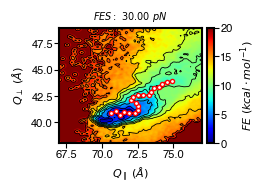

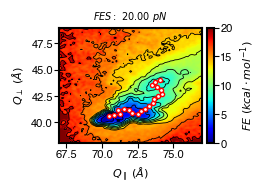

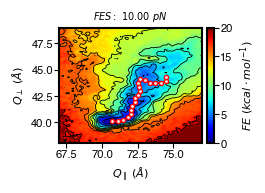

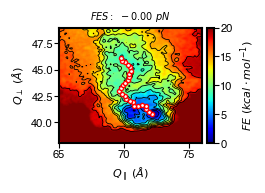

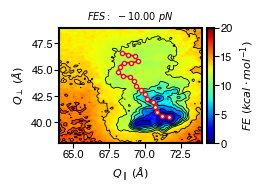

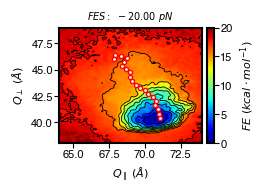

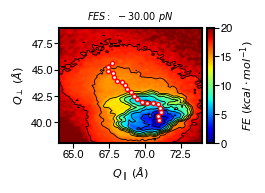

In [16]:
from stringbase import *

barrier=20
force_barriers_str = {}
force_peak = []

for key in apo_all_fes_ext_proj:
    if key == "0.0":
        file_template = F"{apo_zero}FFORCE_fes_projext_rw.dat"
    else:
        file_template = F"{apo_dir}FFORCE_fes_projext_rw.dat"
    runs=apo_all_fes_ext_proj[key]
    final_name = file_template.replace('FORCE', key)
    for i,run in enumerate(runs):
        fig,ax = plt.subplots(figsize=(2, 1.5))
        x = run[:,0]
        y = run[:,1]
        z = run[:,2]
        index=np.where((z>=barrier))[0]
        z[index]=barrier
        X = np.linspace(np.amin(x),np.amax(x), 101)
        Y = np.linspace(np.amin(y), np.amax(y), 101)
        XZ = z.reshape(101,101)
        #fes_twocv.append(XZ)
        ax.contour(X, Y, XZ, 10, colors='black', linewidths=0.6)
        im=ax.imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_title(r"$FES:\ %.2f\ pN$"%(float(key)*-1), size=7)
        ax.set_xlabel(r'$Q_\parallel\ (\AA)$', size=8)
        ax.set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
        # ax.set_xticks([i for i in range(40,91,5)])
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(im, ax=ax, cax=cax2)
        cbar.ax.tick_params(labelsize=8)
        cbar.set_label(r"$FE\ (kcal \cdot mol^{-1})$")
        
        landscape = Landscape.from_plumed(final_name,barrier)
        
        if float(key)< 0:
            x_string=np.linspace(70.5,75,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(40.5,44.5,20)

        elif float(key)==0:
            x_string=np.linspace(72.5,69.5,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(40.5,46.0,20)
            
        else:
            x_string=np.linspace(71.5,67.5,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(40,46.0,20)
        
        string = String(x_string,y_string)
        string.reparameterize(len(x_string))
        np.random.seed(5)
        
        drift_factor = 0.001
        if key == '0.0':
            sigma = 0.01 #for random walk
            N = 25
        else:
            sigma = 0.01 #for random walk
            N = 20
            
        t = 0

        string_history = [(string.xdata.copy(),string.ydata.copy())]

        for t in range(4000):
            string.random_walk(sigma,sigma)
            string.drift(landscape,drift_factor)
            string.untangle()
            string.reparameterize(N)
            string_history.append((string.xdata.copy(),string.ydata.copy()))

        
        idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
        data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
        force_barriers_str[key]=data_min
        peak = np.max(string.get_pmf(landscape)-min(string.get_pmf(landscape)))
        force_peak.append([float(key),peak])
        ax.plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='r', markersize=3)
        plt.show()       

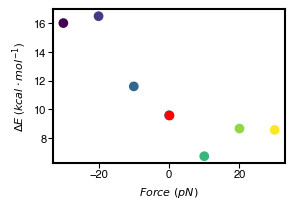

In [19]:
peak_data = np.array(force_peak)
plot_peaks(r'$kcal \cdot mol^{-1}$', 'aligned', peak_data, figure_dir)

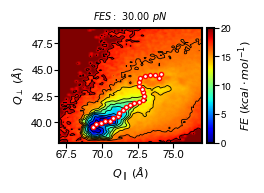

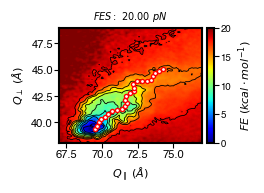

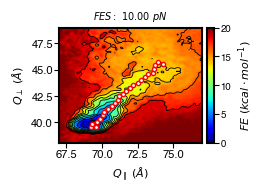

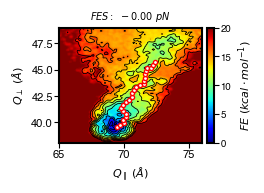

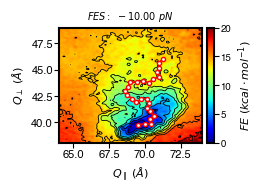

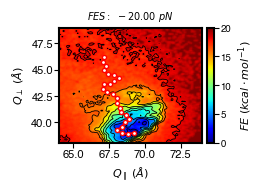

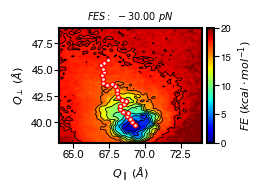

In [20]:
from stringbase import *

barrier=20
hforce_barriers_str = {}
force_peak_holo = []

for key in all_fes_ext_proj:
    if key == "0.0":
        file_template = F"{holo_zero}FFORCE_fes_projext_rw.dat"
    else:
        file_template = F"{holo_dir}FFORCE_fes_projext_rw.dat"
    runs=all_fes_ext_proj[key]
    final_name = file_template.replace('FORCE', key)
    for i,run in enumerate(runs):
        fig,ax = plt.subplots(figsize=(2, 1.5))
        x = run[:,0]
        y = run[:,1]
        z = run[:,2]
        index=np.where((z>=barrier))[0]
        z[index]=barrier
        X = np.linspace(np.amin(x),np.amax(x), 101)
        Y = np.linspace(np.amin(y), np.amax(y), 101)
        XZ = z.reshape(101,101)
        #fes_twocv.append(XZ)
        ax.contour(X, Y, XZ, 10, colors='black', linewidths=0.6)
        im=ax.imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_title(r"$FES:\ %.2f\ pN$"%(float(key)*-1), size=7)
        ax.set_xlabel(r'$Q_\parallel\ (\AA)$', size=8)
        ax.set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
        # ax.set_xticks([i for i in range(40,91,5)])
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(im, ax=ax, cax=cax2)
        cbar.ax.tick_params(labelsize=7)
        cbar.set_label(r"$FE\ (kcal \cdot mol^{-1})$")
        
        landscape = Landscape.from_plumed(final_name,barrier)
        
        if float(key)< 0:
            x_string=np.linspace(69.5,74,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.5,45.5,20)

        elif float(key)==0:
            x_string=np.linspace(69.5,72.,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.5,46.0,20)
            
        elif float(key)==10:
            x_string=np.linspace(69.5,71,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.25,46.0,20)   
            
        else:
            x_string=np.linspace(69.5,67,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39,46,20)
        
        string = String(x_string,y_string)
        string.reparameterize(len(x_string))
        np.random.seed(48)
        
        drift_factor = 0.001
        sigma = 0.01 #for random walk
        N = 25
        t = 0

        string_history = [(string.xdata.copy(),string.ydata.copy())]

        for t in range(4000):
            string.random_walk(sigma,sigma)
            string.drift(landscape,drift_factor)
            string.untangle()
            string.reparameterize(N)
            string_history.append((string.xdata.copy(),string.ydata.copy()))

        
        idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
        data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
        hforce_barriers_str[key]=data_min
        peak = np.max(string.get_pmf(landscape)-min(string.get_pmf(landscape)))
        force_peak_holo.append([float(key),peak])
       
        ax.plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='r',markersize=3)
        #fig.savefig(F"{figure_dir}/fes_extproj_rw_{key}_plumed_wham_str_holo.png", bbox_inches='tight')
        plt.show()       

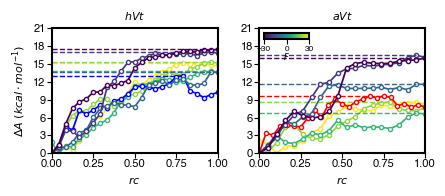

In [21]:
fig, ax = plt.subplots(1,2,figsize=(4.5,2.0))

plot_energy_path_str_f('kcal \cdot mol^{-1}','hVt',hforce_barriers_str,figure_dir,ax[0])
plot_energy_path_str_f('kcal \cdot mol^{-1}','aVt',force_barriers_str,figure_dir,ax[1])

#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25,hspace=0.45)
plt.tight_layout()
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(-30, 30)
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbaxes = inset_axes(ax[1], width=0.45, height='5%', loc='upper left')
cbar = fig.colorbar(sm,cax=cbaxes, ticks = [-30.,0,30], orientation='horizontal')
cbar.ax.tick_params(labelsize=6) 
cbar.set_label(r'$F$', fontsize=6, labelpad=-1)

plt.savefig(f"{figure_dir}/ext_proj_holo_vs_apo_pathF_v4.pdf", format='pdf' )
plt.show()

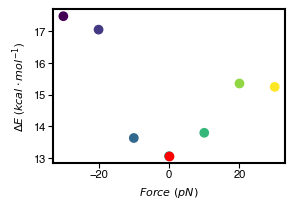

In [22]:
peak_data_holo = np.array(force_peak_holo)
plot_peaks(r'$kcal \cdot mol^{-1}$', 'holo', peak_data_holo, figure_dir)


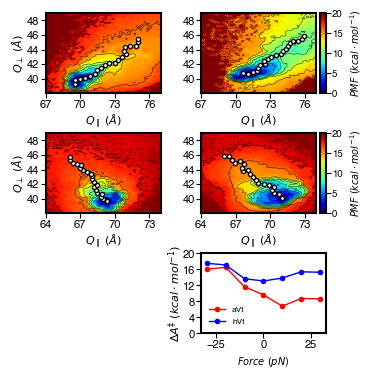

In [23]:
plot_force = ["-30.0","30.0"]
barrier=20 

fig, ax = plt.subplots(3,2,figsize=(3.5,4))
i,j=0,0
k,l=0,0
for pforce in plot_force:
    
    run=all_fes_ext_proj[pforce][0]
    x = run[:,0]
    y = run[:,1]
    z = run[:,2]
    index=np.where((z>=barrier))[0]
    z[index]=barrier
    X = np.linspace(np.amin(x),np.amax(x), 101)
    Y = np.linspace(np.amin(y), np.amax(y), 101)
    XZ = z.reshape(101,101)
    ax[i,j].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
    im=ax[i,j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
    
    ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8, labelpad=2)
    ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=8, labelpad=1)
    ax[i,j].set_yticks([d for d in range(40,49,2)])
    divider = make_axes_locatable(ax[i,j])
    cax2 = divider.append_axes("right", size="5%", pad=0.035)
    cax2.axis('off')
    #cbar=fig.colorbar(im, ax=ax, cax=cax2)
    #cbar.ax.tick_params(labelsize=7)
    #cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=7)
    if float(pforce)<0:
        ax[i,j].set_xticks([d for d in range(67,78,3)])
        #ax[i,j].set_title(r"$hVt$", size=7)
    else:
        ax[i,j].set_xticks([d for d in range(64,75,3)])
       
    final_name = F"{holo_dir}F{pforce}_fes_projext_rw.dat"
    landscape = Landscape.from_plumed(final_name,barrier)
    
    if float(pforce)< 0:
        x_string=np.linspace(69.5,75,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(39,45.5,20)

    elif float(pforce)==0:
        x_string=np.linspace(69.5,72.5,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(39.5,46.,20)
        
    else:
        x_string=np.linspace(70,66,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(39,46,20)

    string = String(x_string,y_string)
    string.reparameterize(len(x_string))
    np.random.seed(3)
    
    drift_factor = 0.001
    sigma = 0.001 #for random walk
    N = 20
    t = 0
    
    string_history = [(string.xdata.copy(),string.ydata.copy())]
    
    for t in range(4000):
        string.random_walk(sigma,sigma)
        string.drift(landscape,drift_factor)
        string.untangle()
        string.reparameterize(N)
        string_history.append((string.xdata.copy(),string.ydata.copy()))
    
    
    idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
    data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
    ax[i,j].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.5, markersize=3)
    
    j = j+1
    
    run=apo_all_fes_ext_proj[pforce][0]
    x = run[:,0]
    y = run[:,1]
    z = run[:,2]
    index=np.where((z>=barrier))[0]
    z[index]=barrier
    X = np.linspace(np.amin(x),np.amax(x), 101)
    Y = np.linspace(np.amin(y), np.amax(y), 101)
    XZ = z.reshape(101,101)
    ax[i,j].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
    im=ax[i,j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
    
    ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8, labelpad=2)
    #ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
    ax[i,j].set_yticks([d for d in range(40,49,2)])
    if float(pforce)<0:
        ax[i,j].set_xticks([d for d in range(67,78,3)])
        #ax[i,j].set_title(r"$aVt$", size=7)
    else:
        ax[i,j].set_xticks([d for d in range(64,75,3)])
    divider = make_axes_locatable(ax[i,j])
    cax2 = divider.append_axes("right", size="5%", pad=0.035)
    cbar=fig.colorbar(im, ax=ax, cax=cax2)
    cbar.ax.tick_params(labelsize=7)
    cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=7)
    final_name = F"{apo_dir}F{pforce}_fes_projext_rw.dat"
    landscape = Landscape.from_plumed(final_name,barrier)
    
    if float(pforce)< 0:
        x_string=np.linspace(70.5,76,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(40.5,46,20)

    elif float(pforce)==0:
        x_string=np.linspace(72.25,70.25,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(40.5,46.5,20)
        
    else:
        x_string=np.linspace(71.5,66,20) #Initial guess for the position of nodes of the string
        y_string=np.linspace(40,46,20)
    
    string = String(x_string,y_string)
    string.reparameterize(len(x_string))
    np.random.seed(3)
    
    drift_factor = 0.001
    sigma = 0.001 #for random walk
    N = 20
    t = 0
    
    string_history = [(string.xdata.copy(),string.ydata.copy())]
    
    for t in range(4000):
        string.random_walk(sigma,sigma)
        string.drift(landscape,drift_factor)
        string.untangle()
        string.reparameterize(N)
        string_history.append((string.xdata.copy(),string.ydata.copy()))
    
    
    idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
    data_min_apo = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
    ax[i,j].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.5, markersize=3)
    proj_val_dx_a,ext_val_dx_a = string.xdata[9],string.ydata[9]
    proj_val_min_a,ext_val_min_a = string.xdata[17],string.ydata[17]


    j=0
    i=i+1

ax[i,j].set_visible(False)
j=j+1
unit='kcal \cdot mol^{-1}'
plot_peaks_conf(unit,'aVt', peak_data, ax[i,j])
plot_peaks_conf(unit,'hVt', peak_data_holo, ax[i,j])
ax[i,j].legend(fontsize=6, frameon=False)
ax[i,j].set_yticks([d for d in range(0,22,4)])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25,hspace=0.5)
plt.savefig(f"{figure_dir}/force_2DPMF_holo_vs_apo_path_v4.pdf",bbox_inches='tight',format='pdf' )
plt.show()


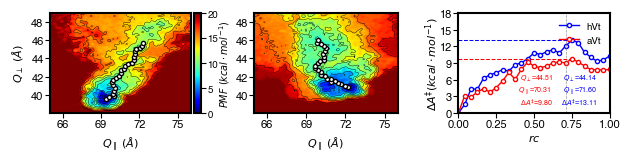

In [26]:
fig, ax = plt.subplots(1,3,figsize=(7,1.25))
i,j=0,0
k,l=0,0

run=all_fes_ext_proj["0.0"][0]
x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
#ax[i].set_title(r"$hVt$", size=7)
ax[i].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8)
ax[i].set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
ax[i].set_yticks([i for i in range(40,49,2)])
ax[i].set_xticks([i for i in range(66,82,3)])
divider = make_axes_locatable(ax[i])
cax2 = divider.append_axes("right", size="5%", pad=0.035)
#cax2.axis('off')
cbar=fig.colorbar(im, ax=ax, cax=cax2)
cbar.ax.tick_params(labelsize=7)
cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=7, labelpad=-1)

final_name = F"{holo_zero}F0.0_fes_projext_rw.dat"
landscape = Landscape.from_plumed(final_name,barrier)

x_string=np.linspace(69.5,72.0,20) #Initial guess for the position of nodes of the string
y_string=np.linspace(39.5,46.0,20)

string = String(x_string,y_string)
string.reparameterize(len(x_string))
np.random.seed(5)

drift_factor = 0.001
sigma = 0.01 #for random walk
N = 25
t = 0

string_history = [(string.xdata.copy(),string.ydata.copy())]

for t in range(4000):#
    string.random_walk(sigma,sigma)
    string.drift(landscape,drift_factor)
    string.untangle()
    string.reparameterize(N)
    string_history.append((string.xdata.copy(),string.ydata.copy()))


idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
ax[i].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.5, markersize=3)
proj_val_dx_h,ext_val_dx_h = string.xdata[18],string.ydata[18]
proj_val_min_h,ext_val_min_h = string.xdata[16],string.ydata[16]

i=i+1


run=apo_all_fes_ext_proj["0.0"][0]
barrier=20

x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
#ax[i].set_title(r"$aVt$",size=7)
ax[i].set_xlabel(r'$Q_\parallel\ (\AA)$', size=8)
#ax[i].set_ylabel(r'$Q_\perp\ (\AA)$', size=8)
ax[i].set_yticks([i for i in range(40,49,2)])
ax[i].set_xticks([i for i in range(66,82,3)])
divider = make_axes_locatable(ax[i])
cax2 = divider.append_axes("right", size="3%", pad=0.035)
#cbar=fig.colorbar(im, ax=ax, cax=cax2)
cax2.axis('off')
#cbar.ax.tick_params(labelsize=7)
#cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=7)
final_name = F"{apo_zero}F0.0_fes_projext_rw.dat"
landscape = Landscape.from_plumed(final_name,barrier)


x_string=np.linspace(72.5,69.5,20) #Initial guess for the position of nodes of the string
y_string=np.linspace(40.5,46.0,20)


string = String(x_string,y_string)
string.reparameterize(len(x_string))
np.random.seed(48)

drift_factor = 0.001
sigma = 0.01 #for random walk
N = 25
t = 0

string_history = [(string.xdata.copy(),string.ydata.copy())]

for t in range(4000):
    string.random_walk(sigma,sigma)
    string.drift(landscape,drift_factor)
    string.untangle()
    string.reparameterize(N)
    string_history.append((string.xdata.copy(),string.ydata.copy()))


idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
data_min_apo = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
ax[i].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.5, markersize=3)
proj_val_dx_a,ext_val_dx_a = string.xdata[18],string.ydata[18]
proj_val_min_a,ext_val_min_a = string.xdata[17],string.ydata[17]

i = i+1

cv_x = r"$Q_{\parallel}$"
cv_y = r"$Q_{\perp}$"
unit = r"$(kcal \cdot mol^{-1})$"
plot_energy_path_str(unit,'hVt',data_min,ax[i],proj_val_dx_h,ext_val_dx_h,cv_x,cv_y)
plot_energy_path_str(unit,'aVt',data_min_apo,ax[i],proj_val_dx_a,ext_val_dx_a,cv_x,cv_y)

ax[i].legend(fontsize=7, frameon=False, loc='upper right')
ax[i].set_yticks([i for i in range(0,19,3)])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)
plt.savefig(f"{figure_dir}/ext_proj_holo_vs_apo_path_v5.pdf",bbox_inches='tight',format='pdf' )
plt.show()


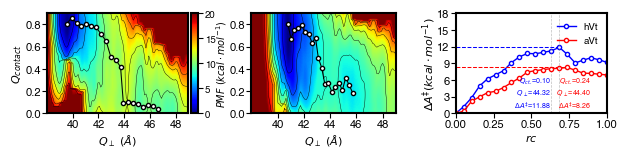

In [27]:
from stringbase import *
fig, ax = plt.subplots(1,3,figsize=(7,1.25))
i,j=0,0
k,l=0,0

run=all_fes_ext_cmap["0.0"][0]
x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
#ax[i].set_title(r"$hVt$", size=12)
ax[i].set_ylabel(r'$Q_{contact}$', size=8,  labelpad=1)
ax[i].set_xlabel(r'$Q_\perp\ (\AA)$', size=8, labelpad=2)
ax[i].set_xticks([i for i in range(40,49,2)])
ax[i].set_yticks([i for i in np.arange(0,1.25,0.2)])
divider = make_axes_locatable(ax[i])
cax2 = divider.append_axes("right", size="5%", pad=0.03)
cbar=fig.colorbar(im, ax=ax[i], cax=cax2)
cbar.ax.tick_params(labelsize=7)
cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$", size=7, labelpad=-1)

final_name = F"{holo_zero}F0.0_fes_extcmap_rw.dat"
landscape = Landscape.from_plumed(final_name,barrier)

y_string=np.linspace(0.7,0.1,20) #Initial guess for the position of nodes of the string
x_string=np.linspace(40,46.0,20)


string = String(x_string,y_string)
string.reparameterize(len(x_string))
np.random.seed(5)

drift_factor = 0.001
sigma = 0.001 #for random walk
N = 20
t = 0

string_history = [(string.xdata.copy(),string.ydata.copy())]

for t in range(4000):
    string.random_walk(sigma,sigma)
    string.drift(landscape,drift_factor)
    string.untangle()
    string.reparameterize(N)
    string_history.append((string.xdata.copy(),string.ydata.copy()))


idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
ax[i].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.75, markersize=3)
ext_val_dx_h,q_val_dx_h = string.xdata[13],string.ydata[13]
ext_val_min_h,q_val_min_h = string.xdata[14],string.ydata[14]


i=i+1

run=apo_all_fes_ext_cmap["0.0"][0]
barrier=20 
x = run[:,0]
y = run[:,1]
z = run[:,2]
index=np.where((z>=barrier))[0]
z[index]=barrier
X = np.linspace(np.amin(x),np.amax(x), 101)
Y = np.linspace(np.amin(y), np.amax(y), 101)
XZ = z.reshape(101,101)
ax[i].contour(X, Y, XZ, 10, colors='black', linewidths=0.3)
im=ax[i].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))

ax[i].set_xlabel(r'$Q_\perp\ (\AA)$', size=8, labelpad=2)
ax[i].set_xticks([i for i in range(40,49,2)])
ax[i].set_yticks([i for i in np.arange(0,1.25,0.2)])
divider = make_axes_locatable(ax[i])
cax2 = divider.append_axes("right", size="2.5%", pad=0.035)
cax2.axis('off')

final_name = F"{apo_zero}F0.0_fes_extcmap_rw.dat"
landscape = Landscape.from_plumed(final_name,barrier)


y_string=np.linspace(0.7,0.1,20) #Initial guess for the position of nodes of the string
x_string=np.linspace(40.25,46.0,20)


string = String(x_string,y_string)
string.reparameterize(len(x_string))
np.random.seed(5)

drift_factor = 0.001
sigma = 0.001 #for random walk
N = 20
t = 0

string_history = [(string.xdata.copy(),string.ydata.copy())]

for t in range(4000):
    string.random_walk(sigma,sigma)
    string.drift(landscape,drift_factor)
    string.untangle()
    string.reparameterize(N)
    string_history.append((string.xdata.copy(),string.ydata.copy()))


idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
data_min_apo = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
ax[i].plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='k',linewidth=0.75, markersize=3 )
ext_val_dx_a,q_val_dx_a = string.xdata[14],string.ydata[14]
ext_val_min_a,q_val_min_a = string.xdata[15],string.ydata[15]


i = i+1

cv_x = r"$Q_{\perp}$"
cv_y = r"$Q_{ct.}$"
unit = r"$(kcal \cdot mol^{-1})$"
plot_energy_path_qs(unit,'hVt',data_min,ax[i],ext_val_dx_h,q_val_dx_h,cv_x,cv_y)
plot_energy_path_qs(unit,'aVt',data_min_apo,ax[i], ext_val_dx_a,q_val_dx_a,cv_x,cv_y)

ax[i].legend(fontsize=7,frameon=False, loc='upper right')
ax[i].set_yticks([i for i in range(0,19,3)])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35,hspace=0.1)
plt.savefig(f"{figure_dir}/ext_cmap_holo_vs_apo_path_v2.pdf",bbox_inches='tight', format='pdf' )
plt.show()


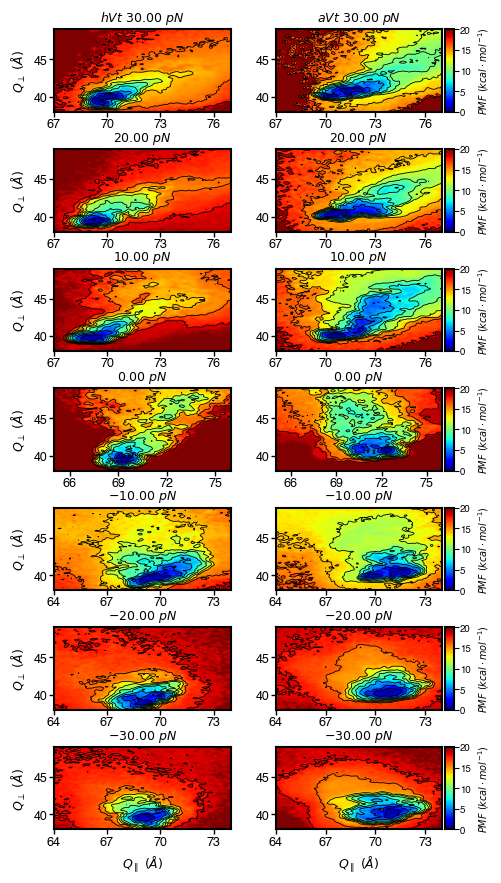

In [28]:
fig, ax = plt.subplots(7,2,figsize=(5,10))
for j in range(2):
    for i,key in enumerate(all_fes_ext_proj):
        if j==1:
            runs = apo_all_fes_ext_proj[key]
        else:
            runs = all_fes_ext_proj[key]
        for r,run in enumerate(runs):
            x = run[:,0]
            y = run[:,1]
            z = run[:,2]
            index=np.where((z>=barrier))[0]
            z[index]=barrier
            X = np.linspace(np.amin(x),np.amax(x), 101)
            Y = np.linspace(np.amin(y), np.amax(y), 101)
            XZ = z.reshape(101,101)
            #fes_twocv.append(XZ)
            ax[i,j].contour(X, Y, XZ, 10, colors='black', linewidths=0.6)
            
            im=ax[i,j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
            
            
            # ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=12)
            # ax.set_xticks([i for i in range(40,91,5)])
     
            if j == 1:
                divider = make_axes_locatable(ax[i,j])
                cax2 = divider.append_axes("right", size="5%", pad=0.035)
                cbar=fig.colorbar(im, ax=ax[i,j], cax=cax2)
                cbar.ax.tick_params(labelsize=7)
                cbar.set_label(r"$PMF\ (kcal \cdot mol^{-1})$",size=7)
            else:
                ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=9)
                
            if i == 0 and j ==1:
                ax[i,j].set_title(r"$aVt \ %.2f\ pN$"%(float(key)*-1), size=9)
            elif i == 0 and j ==0:
                ax[i,j].set_title(r"$hVt \ %.2f\ pN$"%(float(key)*-1), size=9)
                ax[i,j].set_ylabel(r'$Q_\perp\ (\AA)$', size=9)
            else:
                ax[i,j].set_title(r"$ %.2f\ pN$"%(float(key)*-1), size=9)
                
                
            if float(key)<0:
                ax[i,j].set_xticks([d for d in range(67,78,3)])
            elif float(key) == 0:
                ax[i,j].set_xticks([d for d in range(66,77,3)])
                ax[i,j].set_title(r"$ %.2f\ pN$"%(0.0), size=9)
            else:
                ax[i,j].set_xticks([d for d in range(64,75,3)])

            ax[i,j].tick_params(axis='both', labelsize=9, width=1)
    ax[i,j].set_xlabel(r'$Q_\parallel\ (\AA)$', size=9)
    

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.25,hspace=0.45)
plt.savefig(f"{figure_dir}/all_forces_apo_holo_v4.pdf",bbox_inches='tight',format='pdf')
plt.show()

In [9]:
def plot_life_time_err(force_list, tau_list, model_name, out_dir, id, error, ax, sym):
    if model_name == 'holo':
        lcolor = 'b'
    else:
        lcolor = 'r'
    fcolors =  cm.viridis(np.linspace(0, 1, 7))
    force_list = np.array(force_list)
    tau_list = np.array(tau_list)
    tot_n_force = len(force_list)
    mid = tot_n_force//2
    tau_pos = tau_list[mid+1:]
    tau_neg = tau_list[:mid+1]
    force_pos = force_list[mid+1:]
    force_neg = force_list[:mid+1]
    error_pos = error[mid+1:]
    error_neg = error[:mid+1]
    lab = F"{model_name}"
    ax.plot(force_pos*-1, tau_pos, c=lcolor,marker=sym,label=rf'{model_name}', linestyle='', mec=fcolors[0], markersize=3)
    ax.errorbar(force_pos*-1, tau_pos, error_pos, c=fcolors[0], linestyle='', capsize=3)
    ax.plot(force_neg*-1, tau_neg, c=lcolor,marker=sym,label=rf'{model_name}', linestyle='', mec=fcolors[-1], markersize=3)
    ax.errorbar(force_neg*-1, tau_neg, error_neg, c=fcolors[-1], linestyle='', capsize=3)
   
    return 1

def plot_life_time_err_b(force_list, tau_list, model_name, out_dir, id, error, ax, sym):
    if model_name == 'hVt':
        lcolor = 'b'
    else:
        lcolor = 'r'
    
    force_list = np.array(force_list)
    tau_list = np.array(tau_list)
    
    ax.plot(force_list*-1, tau_list, c=lcolor,marker=sym,label=rf'{model_name}', linestyle='--', mec=lcolor, linewidth=1, markersize=3)
    ax.errorbar(force_list*-1, tau_list, error, c=lcolor, linestyle='', capsize=3, linewidth=0.85)
    ax.tick_params(axis='both', labelsize=9, width=1)
    return 1


def plot_cdfs(x, y, tx, tcdf, rid, force, model_name, out_dir, ax):

    ax.step(x, y, c='k', label=F'ECDF: {rid}')
    ax.plot(tx, tcdf, label=F'TCDF \n F={-1*float(force)}', c='r')
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
    ax.set_xlim(min(x), max(x))
    if model_name == 'aVt':
        lloc = 'upper right'
    else:
        lloc = 'upper left'
    ax.legend(fontsize=5, loc=lloc, frameon=False)
    
   
    return 1

In [3]:
holo_data_path = "../holo/rates/outputs/"
apo_data_path = "../aligned/rates/outputs/"
file_name = "f_lifetimes_force_err_proj_noq.dat"
holo_data = np.genfromtxt(holo_data_path+file_name, comments='#', dtype=float)
apo_data = np.genfromtxt(apo_data_path+file_name, comments='#', dtype=float)

holo_forces = holo_data[:,0]
holo_taus = holo_data[:,1]
holo_err = holo_data[:,2]

apo_forces = apo_data[:,0]
apo_taus = apo_data[:,1]
apo_err = apo_data[:,2]


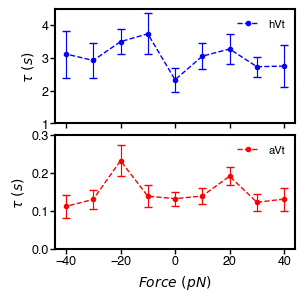

In [12]:

fig, axs = plt.subplots(2,1,figsize=(3.0,3.0), sharex=True)
out_dir=figure_dir
i,j=0,0
k,l=0,0
ax=axs[0]
plot_life_time_err_b(holo_forces, holo_taus, 'hVt', out_dir, 'opesf', holo_err, ax, 'o')
#ax[0].legend(fontsize=10, loc='best')
ax.set_ylabel(r"$\tau \ (s)$", fontsize=10)
#ax.set_xlabel(r"$Force\ (pN)$", fontsize=10)
#ax.set_xticks([])
#ax.set_title(r'$hVt$', fontsize=12)
ax.legend(frameon=False,fontsize=8,loc='best')
ax.tick_params(axis='y', labelcolor='k')

ax2 = axs[1]
plot_life_time_err_b(apo_forces, apo_taus, 'aVt', out_dir, 'opesf', apo_err, ax2, 'o')
#ax[1].legend(fontsize=10, loc='best')
ax2.set_ylabel(r"$\tau \ (s)$", fontsize=10)
ax2.set_xlabel(r"$Force\ (pN)$", fontsize=10)
#ax2.set_title(r'$aVt$', fontsize=12)
ax2.legend(frameon=False,fontsize=8, loc='best')
ax.set_yticks([i for i in np.linspace(1,4,4)])
ax2.set_yticks([i for i in np.linspace(0,0.3,4)])
#ax2.set_xticks([])
ax2.tick_params(axis='y', labelcolor='k')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.1)
plt.savefig(f"{figure_dir}/taus_apo_vs_holo_proj_v6.pdf", bbox_inches='tight', format='pdf')
plt.show()

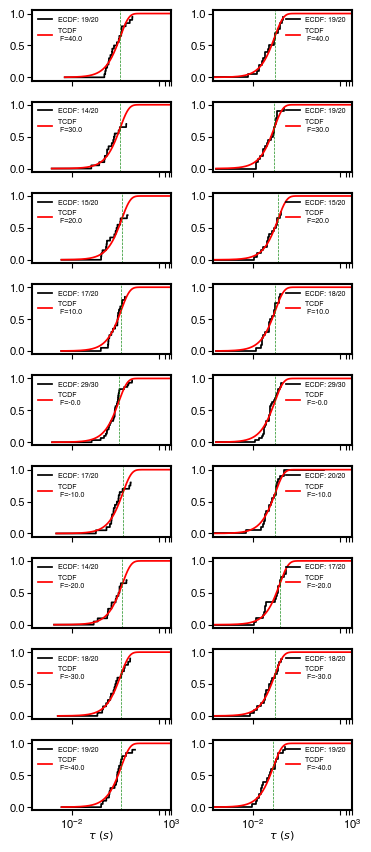

In [13]:
fig, ax = plt.subplots(9,2,figsize=(4,10), sharex=True)
for i,f in enumerate(holo_forces):
    full_path = holo_data_path+f"F{f}_holonescape.dat"
    time_domain,ecdf = np.loadtxt(full_path, comments=["#"], usecols=(0,1), unpack=True)
    full_patht = holo_data_path+f"F{f}_holonescapet.dat"
    time_domaint,tcdf = np.loadtxt(full_patht, comments=["#"], usecols=(0,1), unpack=True)
    
    nrun = int(holo_data[:,3][i])
    if i == 4:
        nrun=f'{nrun}/30'
    else:
        nrun=f'{nrun}/20'
        
    tau_i = holo_data[:,1][i]
    plot_cdfs(x=time_domain, y=ecdf, tx=time_domaint, tcdf=tcdf, rid=nrun, force=f, model_name='hVt', out_dir=figure_dir, ax=ax[i,0])
    ax[i,0].set_yticks([i for i in np.linspace(0,1,3)])
    ax[i,0].set_xticks([i for i in np.linspace(10e-3,1e3,5)])
    ax[i,0].axvline(x=tau_i, color='g', linestyle='--', alpha=0.9,linewidth=0.5)
    

ax[i,0].set_xlabel(r"$\tau \ (s)$", size=8, labelpad=-1)

for i,f in enumerate(apo_forces):
    full_path = apo_data_path+f"F{f}_aponescape.dat"
    time_domain,ecdf= np.loadtxt(full_path, comments=["#"], usecols=(0,1), unpack=True)
    full_patht = apo_data_path+f"F{f}_aponescapet.dat"
    time_domaint,tcdf= np.loadtxt(full_patht, comments=["#"], usecols=(0,1), unpack=True)
    nrun = int(apo_data[:,3][i])
    if i == 4:
        nrun=f'{nrun}/30'
    else:
        nrun=f'{nrun}/20'
    
    tau_i = apo_data[:,1][i]
    plot_cdfs(x=time_domain, y=ecdf, tx=time_domaint,tcdf=tcdf, rid=nrun, force=f, model_name='aVt', out_dir=figure_dir, ax=ax[i,1])
    ax[i,1].set_yticks([i for i in np.linspace(0,1,3)])
    ax[i,1].set_xticks([i for i in np.linspace(10e-3,1e3,5)])
    ax[i,1].axvline(x=tau_i, color='g', linestyle='--', alpha=0.9,linewidth=0.5)

ax[i,1].set_xlabel(r"$\tau \ (s)$", size=8, labelpad=-1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3,hspace=0.3)
plt.savefig(f"{figure_dir}/cdfs_hvt_avt.pdf", bbox_inches='tight', format='pdf')
plt.show()

In [53]:
file_name = 'bsa.dat'
hbsa_dir = '../holo/bsa/outputs/'
absa_dir = '../aligned/bsa/outputs/'
h_dat = np.genfromtxt(hbsa_dir+file_name, comments='#', dtype=float)
a_dat = np.genfromtxt(absa_dir+file_name, comments='#', dtype=float)
   
forces_pN = np.linspace(-30.0,30.0,7)
keys = [str(f) for f in forces_pN]
holo_pdf = {}
apo_pdf = {}
for force in keys:
    file_name = f"bsa_kde_{force}.dat"
    pdf_h = np.genfromtxt(hbsa_dir+file_name, comments='#', dtype=float)
    pdf_a = np.genfromtxt(absa_dir+file_name, comments='#', dtype=float)
    holo_pdf[force]=pdf_h
    apo_pdf[force]=pdf_a


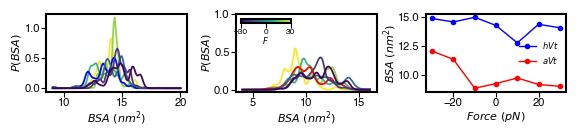

In [54]:
fig, ax = plt.subplots(1,3,figsize=(6.5,1.3))
i,j=0,0
fcolors =  np.flip(cm.viridis(np.linspace(0, 1, len(forces_pN))),axis=0)
forces = h_dat[:,0]
peaks_h = h_dat[:,1]
peaks_a = a_dat[:,1]
ax[2].plot(forces*-1, peaks_h, 'o-',color='b', label=r'$hVt$',linewidth=1, markersize=3)
ax[2].plot(forces*-1, peaks_a, 'o-',color='r', label=r'$aVt$',linewidth=1, markersize=3)
ax[2].legend(frameon=False,fontsize=6,loc='center right')
ax[2].set_xlabel(r'$Force \ (pN)$', labelpad=1)
ax[2].set_ylabel(r'$BSA \ (nm^2)$', labelpad=-1)
for i,force in enumerate(keys):
    pdf_h = holo_pdf[force]
    pdf_a = apo_pdf[force]
    if force == '0.0':
        afcolor = 'r'
        hfcolor = 'b'
    else:
        afcolor=fcolors[i]
        hfcolor=fcolors[i]
    
    ax[1].plot(pdf_a[:,0][50:],pdf_a[:,1][50:], color=afcolor)
    ax[0].plot(pdf_h[:,0][90:],pdf_h[:,1][90:], color=hfcolor)

ax[0].set_ylabel(r'$P(BSA)$', labelpad=1)
ax[0].set_xlabel(r'$BSA \ (nm^2)$', labelpad=1)
ax[0].set_yticks([i for i in np.linspace(0,1,3)])  
ax[1].set_ylabel(r'$P(BSA)$',labelpad=1)
ax[1].set_xlabel(r'$BSA \ (nm^2)$', labelpad=1)
ax[1].set_yticks([i for i in np.linspace(0,1,3)])  


plt.subplots_adjust(left=0.1, bottom=0.3, right=0.9, top=0.9, wspace=0.35,hspace=0.1)
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(-30, 30)
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbaxes = inset_axes(ax[1], width=0.50, height='5%', loc='upper left')
cbar = fig.colorbar(sm,cax=cbaxes, ticks = [-30.,0,30], orientation='horizontal')
cbar.ax.tick_params(labelsize=6) 
cbar.set_label(r'$F$', fontsize=6, labelpad=-1)


plt.savefig(f"{figure_dir}/bsa_apo_holo_v2.pdf",  format='pdf')   
plt.show()  